<a href="https://colab.research.google.com/github/chinmay5/NLP-Praktikum/blob/sentence_embedding/SiameseMitLASEROneShot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is an attempt to include the LASER multi lingual embedding


In [1]:
!git clone https://github.com/ceshine/LASER.git

Cloning into 'LASER'...
remote: Enumerating objects: 591, done.
remote: Total 591 (delta 0), reused 0 (delta 0), pack-reused 591
Receiving objects: 100% (591/591), 2.60 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [0]:
#!rm -rf \"

In [3]:
%env LASER=/content/LASER
!echo $LASER


env: LASER=/content/LASER
/content/LASER


In [4]:
!pwd


/content


In [5]:
%cd LASER

/content/LASER


In [6]:
! pwd

/content/LASER


In [7]:
!bash install_models.sh

 - creating directory /content/LASER/models
 - bilstm.93langs.2018-12-26.pt
 - 93langs.fcodes
 - 93langs.fvocab


In [8]:
!bash install_external_tools.sh

Installing external tools
 - creating directory /content/LASER/tools-external/moses-tokenizer/tokenizer
 - download tokenizer/tokenizer.perl
 - download tokenizer/detokenizer.perl
 - download tokenizer/normalize-punctuation.perl
 - download tokenizer/remove-non-printing-char.perl
 - download tokenizer/deescape-special-chars.perl
 - download tokenizer/lowercase.perl
 - download tokenizer/basic-protected-patterns
 - creating directory /content/LASER/tools-external/moses-tokenizer/share/nonbreaking_prefixes
 - download share/nonbreaking_prefixes/nonbreaking_prefix.ca
 - download share/nonbreaking_prefixes/nonbreaking_prefix.cs
 - download share/nonbreaking_prefixes/nonbreaking_prefix.de
 - download share/nonbreaking_prefixes/nonbreaking_prefix.el
 - download share/nonbreaking_prefixes/nonbreaking_prefix.en
 - download share/nonbreaking_prefixes/nonbreaking_prefix.es
 - download share/nonbreaking_prefixes/nonbreaking_prefix.fi
 - download share/nonbreaking_prefixes/nonbreaking_prefix.fr
 -

In [46]:
%cd /content/LASER
%cd tools-external/fastBPE/
! g++ -std=c++11 -pthread -O3 fastBPE/main.cc -IfastBPE -o fast

/content/LASER
/content/LASER/tools-external/fastBPE


In [11]:
%cd ../../tasks/mldoc/
! ls

/content/LASER/tasks/mldoc
mldoc.py  mldoc.sh  README.md


In [12]:
! apt install libopenblas-base libomp-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopenblas-base is already the newest version (0.2.20+ds-4).
libopenblas-base set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 0s (1,095 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb 

In [13]:
! pip install faiss

     |████████████████████████████████| 4.7MB 1.8MB/s 


In [50]:
% cd /content/LASER/tasks/similarity
! bash wmt.sh

/content/LASER/tasks/similarity
 - Download WMT data
LASER: similarity search

Processing:
 - loading encoder /content/LASER/models/bilstm.93langs.2018-12-26.pt
 - transfer encoder to GPU
 - creating directory embed
 - Tokenizer: newstest2012.cs in language cs  
 - fast BPE: processing newstest2012.tok.cs
 - Encoder: newstest2012.bpe.cs to newstest2012.enc.cs
 - Encoder: 3003 sentences in 3s
 - embedding: ./embed/newstest2012.enc.cs 3003 examples of dim 1024
 - creating FAISS index
 - Tokenizer: newstest2012.de in language de  
 - fast BPE: processing newstest2012.tok.de
 - Encoder: newstest2012.bpe.de to newstest2012.enc.de
 - Encoder: 3003 sentences in 2s
 - embedding: ./embed/newstest2012.enc.de 3003 examples of dim 1024
 - creating FAISS index
 - Tokenizer: newstest2012.en in language en  
 - fast BPE: processing newstest2012.tok.en
 - Encoder: newstest2012.bpe.en to newstest2012.enc.en
 - Encoder: 3003 sentences in 2s
 - embedding: ./embed/newstest2012.enc.en 3003 examples of dim 

In [14]:
! git clone https://github.com/facebookresearch/MLDoc.git

Cloning into 'MLDoc'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 183 (delta 2), reused 0 (delta 0), pack-reused 177
Receiving objects: 100% (183/183), 1.75 MiB | 15.59 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [0]:
% mv MLDoc/mldoc-indices/* MLDoc/

In [65]:
% cd /content/LASER/tasks/mldoc/
! bash mldoc.sh

/content/LASER/tasks/mldoc

Extracting MLDoc data
input is ./MLDoc with english.train.1000
/content/LASER/tasks/mldoc
input file name is ./MLDoc/english.train.1000
 - extract labels from ./MLDoc/english.train.1000
 - extract texts from ./MLDoc/english.train.1000
input is ./MLDoc with english.dev
/content/LASER/tasks/mldoc
input file name is ./MLDoc/english.dev
 - extract labels from ./MLDoc/english.dev
 - extract texts from ./MLDoc/english.dev
input is ./MLDoc with english.test
/content/LASER/tasks/mldoc
input file name is ./MLDoc/english.test
 - extract labels from ./MLDoc/english.test
 - extract texts from ./MLDoc/english.test
LASER: calculate embeddings for MLDoc
 - loading encoder /content/LASER/models/bilstm.93langs.2018-12-26.pt

Processing:
 - Split sentences: embed/english.train.1000.tok.en
 -                  lines/max words: 1000/1 -> 1000/2
 - Combine embeddings:
                input: embed/english.train.1000.split.enc.en 1000 sentences
                IDs: embed/english.tr

In [0]:
! rm -rf embed/*

In [59]:
%%bash
/content/LASER/tools-external/fastBPE/fast applybpe embed/mldoc.train1000.split.bpe.en embed/mldoc.train1000.split.en /content/LASER/models/93langs.fcodes /content/LASER/models/93langs.fvocab

Loading vocabulary from /content/LASER/models/93langs.fvocab ...
Read 2369862597 words (73636 unique) from vocabulary file.
Loading codes from /content/LASER/models/93langs.fcodes ...
Read 50000 codes from the codes file.
Loading vocabulary from embed/mldoc.train1000.split.en ...
Read 0 words (0 unique) from text file.
Applying BPE to embed/mldoc.train1000.split.en ...
Output memory map failed : 22.


In [0]:
# sample feasibility check
# % cd ../../source/

import os
import sys
LASER = os.environ['LASER']
# now include the extra files in the source
sys.path.append(LASER + '/source')
sys.path.append(LASER + '/source/lib')

In [0]:
from embed import SentenceEncoder, EncodeLoad, EncodeFile
from text_processing import Token, BPEfastApply
from indexing import IndexCreate, IndexSearchMultiple, IndexPrintConfusionMatrix

#Essential Imports before we start the training

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt 
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pandas import Series
from google.colab import drive
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from tensorflow import summary
from torch.utils.data import BatchSampler
from collections import Counter
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix, classification_report
from torch.utils.tensorboard import SummaryWriter
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [0]:
# Dictionary for label to index, this has been pre-generated
encoding_to_labels = {
   0:	"Amazon Instant Videos",
   1 :"Android Apps",
   2 : "Automotive",
   3 :"Baby",
   4 :"Beauty",
   5 :"CDs and Vinyl",
   6 :"Cell Phones and Accessories",
   7 :"Clothing, Shoes, Jewelry",
   8 :"Digital Music",
   9 :"Electronics",
  10 :"Grocery and Gourmet",
  11 :"Health and Personal Care",
  12 :"Home and Kitchen",
  13 :"Kindle",
  14 :"Movies and TV",
  15 :"Musical Instruments",
  16 :"Office Products",
  17 :"Patio Garden",
  18 :"Pet Supplies",
  19 :"Sports, Outdoors",
  20 :"Tool and Home Improvement",
  21 :"Toys_and_Games",
  22 :"Video Games"
}

In [0]:
def get_lebel_from_code(code):
  if code not in encoding_to_labels.keys():
    raise KeyError("Invalid Code")
  return encoding_to_labels[code]

def get_all_labels():
  return list(encoding_to_labels.values())

## Please make your life easy and execute these statements. If any error pops up, reset runtime and restart

In [4]:
!pip install -q tb-nightly

     |████████████████████████████████| 3.9MB 9.6MB/s 


In [0]:
# # Delete any old logs.... be smart while using this
% rm -rf /content/logs/

In [0]:
% mkdir -p '/content/logs/tensorboard/round2/train/'
% mkdir -p '/content/logs/tensorboard/round2/val/'

In [0]:
%load_ext tensorboard

## These are the steps to replicate results of the LSTM file

In [69]:
MODEL_PATH = '/content/LASER/models/'
sentence_encoder = SentenceEncoder(
    str(MODEL_PATH + "bilstm.93langs.2018-12-26.pt"),
    max_sentences=None,
    max_tokens=10000,
    cpu=False)
sentence_encoder.use_cuda=True #just a guess not sure if this would actually help

NameError: ignored

# This is the code section for trying Triplet Generation


In [0]:
class TripletDataset(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """

    def __init__(self, dataset, select_column, training_mode=True):
         
        
        self.dataset = dataset
        self.train = training_mode
        self.select_column = select_column
        if self.train:
            self.train_labels = self.dataset.labels_encoded
            # Drop the labels column so that remaining features form part of the training set
            self.dataset = self.dataset.drop('labels_encoded', axis=1)
            self.train_data = self.dataset
            self.labels_set = set(self.train_labels.to_numpy())
            self.label_to_indices = {label: np.where(self.train_labels.to_numpy() == label)[0]
                                     for label in self.labels_set} # redundent in our case if we decide to use numeric labels based on certain sklearn packages

        else:
            self.test_labels = self.dataset.labels_encoded
            # Drop the labels column so that remaining features form part of the training set
            self.dataset = self.dataset.drop('labels_encoded', axis=1)
            self.test_data = self.dataset
            # generate fixed triplets for testing
            self.labels_set = set(self.test_labels.to_numpy())
            self.label_to_indices = {label: np.where(self.test_labels.to_numpy() == label)[0]
                                     for label in self.labels_set}

            random_state = np.random.RandomState(42)
            
            #print("Length of the dataset is {}".format(len(self.test_data)))
            
            triplets = []
            for i in range(len(self.test_data)):
                  triplets.append([i,
                           random_state.choice(self.label_to_indices[self.test_labels.iloc[i]]),
                           random_state.choice(self.label_to_indices[
                                                 np.random.choice(
                                                     list(self.labels_set - set([self.test_labels.iloc[i]]))
                                                 )
                                             ])
                         ]) 
                         
            self.test_triplets = triplets
           
    def __getitem__(self, index):
        if self.train:
            #print(type(self.train_data))
            img1, label1 = self.train_data.iloc[index], self.train_labels.iloc[index]
            positive_index = index
            while positive_index == index:
                positive_index = np.random.choice(self.label_to_indices[label1])
            negative_label = np.random.choice(list(self.labels_set - set([label1])))
            negative_index = np.random.choice(self.label_to_indices[negative_label])
            img2 = self.train_data.iloc[positive_index]
            img3 = self.train_data.iloc[negative_index]
        else:
            img1 = self.test_data.iloc[self.test_triplets[index][0]]
            img2 = self.test_data.iloc[self.test_triplets[index][1]]
            img3 = self.test_data.iloc[self.test_triplets[index][2]]

        img1 = img1[self.select_column]
        img2 = img2[self.select_column]
        img3 = img3[self.select_column]
        
        #print("Computation of the entities are completed")

        return (img1, img2, img3)

    def __len__(self):
        return len(self.dataset)

## Load the entire dataset in this section

In [0]:
%cd /content/
input_data = pd.read_csv('actual_dataset.csv')

In [0]:
input_data.columns

In [0]:
input_data.head()

### We would use review.text as the input and use it to predict review.primaryCategories

In [0]:
input_data.Product_Category.describe()

In [0]:
input_data = input_data.rename(columns={'Product_Category':'label'})
input_data.head()

In [0]:
LASER = os.environ['LASER']
FASTBPE = LASER + '/tools-external/fastBPE/fast'
MOSES_BDIR = LASER + '/tools-external/moses-tokenizer/tokenizer/'
MOSES_TOKENIZER = MOSES_BDIR + 'tokenizer.perl -q -no-escape -threads 20 -l '
MOSES_LC = MOSES_BDIR + 'lowercase.perl'
NORM_PUNC = MOSES_BDIR + 'normalize-punctuation.perl -l '
DESCAPE = MOSES_BDIR + 'deescape-special-chars.perl'
REM_NON_PRINT_CHAR = MOSES_BDIR + 'remove-non-printing-char.perl'
MECAB = LASER + '/tools-external/mecab'

In [0]:
from subprocess import check_output
def sample_token(string_val, lang='en'):
    tok = check_output(
                REM_NON_PRINT_CHAR
                + '|' + NORM_PUNC + lang
                + '|' + DESCAPE
                + '|' + MOSES_TOKENIZER + lang
                + ('| python3 -m jieba -d ' if lang == 'zh' else '')
                + ('|' + MECAB + '/bin/mecab -O wakati -b 50000 ' if lang == 'ja' else ''),
                input=string_val,
                encoding='UTF-8',
                shell=True)
    return tok.strip()

### Clean the data as that might cause problems later

In [0]:
index = input_data.reviewText.isnull()==True
samp = index[index==True]
input_data = input_data.drop(samp.index)

In [0]:
input_data.reviewText.isnull().sum() #Value should be always zero

In [0]:
"""
  Do the above mentioned operation on all the entries in the column. So,
  
"""
input_data['tokenized_review'] = input_data.reviewText.apply(sample_token)

In [0]:
bpe_codes = './LASER/models/93langs.fcodes'
bpe_vocab = bpe_codes.replace('fcodes', 'fvocab')


def apply_bpe(sentence):
  sentence = sentence.replace('"','\\"')
  bpe = check_output(
      'echo -n "'+sentence +'" | '+ FASTBPE + ' applybpe_stream '+  bpe_codes +' '+bpe_vocab,
      encoding='UTF-8',
      shell=True)
  return bpe.strip()


#input_data['tokenized_review_bpe'] = input_data.reviewText.apply(bpe_sentences)


In [0]:
tok_sentence = '"love the magnet easel ... " slow motion me "great for moving to different areas ... wish it had some sort of non skid pad on bottom though ...'
apply_bpe(tok_sentence)

In [0]:
input_data['tokenized_review_bpe'] = input_data.tokenized_review.apply(apply_bpe)


In [0]:
"""
  Let's encode the values in here so that we can use them as label encoder later
"""
# import labelencoder
# instantiate labelencoder object
le = LabelEncoder()

input_data['labels_encoded'] = le.fit_transform(input_data['label'])

In [0]:
input_data.to_csv('./preprocessed_output.csv')

# Reading preprocessed output uptil BPE and then converting it into sentence embeddings

In [0]:
# Trying to apply the sentence encoding so that we can store the entire thing
%cd /content/
input_data = pd.read_csv('./preprocessed_output.csv')

In [0]:
# Directly copy pasted from stackoverflow 
# https://stackoverflow.com/questions/35092720/verbosity-pandas-apply

In [0]:
# Because of the nature in which LASER tends to perform encoding we have to do this extra tweek
def to_list(element):
  return [element]

In [0]:
input_data['tokenized_review_bpe_list'] = input_data.tokenized_review_bpe.apply(to_list)


In [0]:
def progress_coroutine(print_on = 10):
    print ("Starting progress monitor")

    iterations = 0
    while True:
        yield
        iterations += 1
        if (iterations % print_on == 0):
            print ("{} iterations done".format(iterations))

def percentage_coroutine(to_process, print_on_percent = 0.10):
    print ("Starting progress percentage monitor")

    processed = 0
    count = 0
    print_count = to_process*print_on_percent
    while True:
        yield
        processed += 1
        count += 1
        if (count >= print_count):
            count = 0
            pct = (float(processed)/float(to_process))*100

            print ("{}% finished".format(pct))

def trace_progress(func, progress = None):
    def callf(*args, **kwargs):
        if (progress is not None):
            progress.send(None)

        return func(*args, **kwargs)

    return callf

def my_func(i):
    return i ** 2

data_series = input_data.tokenized_review_bpe_list
#co1 = progress_coroutine()
co2 = percentage_coroutine(len(data_series))
input_data['sentence_embedding'] = data_series.apply(trace_progress(sentence_encoder.encode_sentences, progress = co2))

In [0]:
"""
  Please let this be here for debugging purpose. The output shape should be (1,1024) ideally

"""
# string_input = 'I like the item pri@@ cing . M@@ y grand@@ dau@@ ghter wanted to mark on it but I wanted it just for the let@@ ters .'
# sentence = (to_list(string_input))
# print(sentence_encoder.encode_sentences(sentence).shape)

In [0]:
# The value should be True
len(input_data.sentence_embedding.iloc[0]) == 1 

In [0]:
input_data = input_data[['sentence_embedding','labels_encoded']]

In [0]:
input_data.to_pickle('./preprocessed_sentence_encoded.pkl')

## If you already have the preprocessed data, use it here

In [0]:
# Reading the file from gdrive which is faster than downloading it
drive.mount("/gdrive", force_remount=True)

In [0]:
%cd /content/
input_data = pd.read_csv('/gdrive/My Drive/d_training_concatenated_230k.csv', index_col=0)

In [0]:
input_data.columns

In [0]:
input_data.head()
#input_data = input_data.drop('Unnamed:0', axis=1)
df = input_data
df = df[pd.notnull(df['tokenized_review_bpe'])]

In [0]:
df.tokenized_review_bpe.isnull().sum()

In [0]:
input_data = df

##  Same set of preprocessing equations that we used for the actual index file

In [0]:
# Because of the nature in which LASER tends to perform encoding we have to do this extra tweek
def to_list(element):
  return [element]

In [0]:
input_data['tokenized_review_bpe_list'] = input_data.tokenized_review_bpe.apply(to_list)


In [0]:
def progress_coroutine(print_on = 10):
    print ("Starting progress monitor")

    iterations = 0
    while True:
        yield
        iterations += 1
        if (iterations % print_on == 0):
            print ("{} iterations done".format(iterations))

def percentage_coroutine(to_process, print_on_percent = 0.10):
    print ("Starting progress percentage monitor")

    processed = 0
    count = 0
    print_count = to_process*print_on_percent
    while True:
        yield
        processed += 1
        count += 1
        if (count >= print_count):
            count = 0
            pct = (float(processed)/float(to_process))*100

            print ("{}% finished".format(pct))

def trace_progress(func, progress = None):
    def callf(*args, **kwargs):
        if (progress is not None):
            progress.send(None)

        return func(*args, **kwargs)

    return callf

def my_func(i):
    return i ** 2

data_series = input_data.tokenized_review_bpe_list
co1 = progress_coroutine()
co2 = percentage_coroutine(len(data_series))
input_data['sentence_embedding'] = data_series.apply(trace_progress(sentence_encoder.encode_sentences, progress = co1))

In [0]:
# The value should be True
len(input_data.sentence_embedding.iloc[0]) == 1 

In [0]:
# Drop irrelevant columns now
input_data = input_data[['sentence_embedding','labels_encoded']]

In [0]:
data_series.to_pickle('/gdrive/My Drive/d_training_concatenated_183k_embedded.pkl')

# If you have sentence embedded dataframe present, use those here directly

In [9]:
# Reading the file from gdrive which is faster than downloading it
drive.mount("/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#input_data.to_csv('/gdrive/My Drive/d_training_concatenated_183k_encoded.pkl')
input_data = pd.read_pickle('/gdrive/My Drive/final_oneshot.pkl')

In [11]:
len(input_data.sentence_embedding)

193947

In [0]:
"""
  Leaving this line here because used it to generate the csv file.
  Should be refactored in the next iteration
"""
# temp_input_data = input_data[:183943]
# len(temp_input_data)
# temp_input_data.to_csv('/gdrive/My Drive/d_training_concatenated_183k.csv')

In [12]:
"""
  Let's encode the values in here so that we can use them as label encoder later
"""
# import labelencoder
# from sklearn.preprocessing import LabelEncoder
# # instantiate labelencoder object
# le = LabelEncoder()

# input_data['labels_encoded'] = le.fit_transform(input_data['label'])

"""
  We are leaving this part here again for completeness since we have a preprocessed dataframe which 
  has most of the things in place
"""

input_data.head()

,sentence_embedding,labels_encoded
0,"[[0.010873658, 0.00056933204, 0.0012553579, 0....",23
1,"[[0.021158801, -7.3974647e-06, 0.006525718, 0....",24
2,"[[0.015974987, 0.0047645643, 0.022270927, 0.04...",25
3,"[[0.010150607, 0.0031098844, 0.009219669, 0.02...",26
4,"[[0.011473727, -3.923003e-05, 0.0009151518, 0....",27


In [13]:
# The value should be True
#len(input_data.sentence_embedding.iloc[0]) == 1 
input_data.sentence_embedding.iloc[0].shape

(1, 1024)

##Quickly check if both train and validate dataloaders work

In [16]:
input_data.head(20)

,sentence_embedding,labels_encoded
0,"[[0.010873658, 0.00056933204, 0.0012553579, 0....",23
1,"[[0.021158801, -7.3974647e-06, 0.006525718, 0....",24
2,"[[0.015974987, 0.0047645643, 0.022270927, 0.04...",25
3,"[[0.010150607, 0.0031098844, 0.009219669, 0.02...",26
4,"[[0.011473727, -3.923003e-05, 0.0009151518, 0....",27
5,"[[0.009419642, 0.0016664175, -0.0016825718, 0....",28
6,"[[0.013822481, -9.5300595e-05, 0.0038704055, 0...",29
7,"[[0.017418101, 0.003224724, 0.00979801, 0.0071...",20
8,"[[0.0093318345, -3.4339969e-06, 0.005169349, 0...",17
9,"[[0.018201692, -7.0058045e-06, 0.0027392416, 0...",16


In [0]:
batch_size = 1000
siamese_train_dataset = TripletDataset(training_mode=True,dataset=input_data,select_column='sentence_embedding')
loader = DataLoader(siamese_train_dataset, batch_size=batch_size,shuffle=True)

In [18]:
for index, (img1,img2,img3) in enumerate(loader):
  print (img1.shape)
  print(img2.shape)
  print(img3.shape)
  break
  

torch.Size([1000, 1, 1024])
torch.Size([1000, 1, 1024])
torch.Size([1000, 1, 1024])


In [0]:
siamese_val_dataset = TripletDataset(training_mode=False,dataset=input_data,select_column='sentence_embedding')
val_loader = DataLoader(siamese_val_dataset, batch_size=batch_size,shuffle=True)

In [20]:
for index, (img1,img2,img3) in enumerate(val_loader):
  print (img1.shape)
  print(img2.shape)
  print(img3.shape)
  break

torch.Size([1000, 1, 1024])
torch.Size([1000, 1, 1024])
torch.Size([1000, 1, 1024])


## Let us drop all the un-necessary columns


In [21]:
# We used this here: https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
input_data = input_data[['sentence_embedding','labels_encoded']]
input_data.head()

,sentence_embedding,labels_encoded
0,"[[0.010873658, 0.00056933204, 0.0012553579, 0....",23
1,"[[0.021158801, -7.3974647e-06, 0.006525718, 0....",24
2,"[[0.015974987, 0.0047645643, 0.022270927, 0.04...",25
3,"[[0.010150607, 0.0031098844, 0.009219669, 0.02...",26
4,"[[0.011473727, -3.923003e-05, 0.0009151518, 0....",27


In [0]:
# Let us split the data into train and test sections. This we can use later for our purpose
# interestingly, missing out on shuffling would lead to unexpected results
# so we need to take care of that as well
# This command shuffles the dataset completely


input_data = input_data.sample(frac=1).reset_index(drop=True)



# now we split it
train_split = 0.8
last_train_index = int(len(input_data) * train_split)
data_train = input_data.iloc[:last_train_index]
data_test = input_data.iloc[last_train_index:]

In [26]:
data_train.labels_encoded.iloc[-1] == data_test.labels_encoded.iloc[0]  #Indicating that our splits of the data are correct

False

In [27]:
labels_train = set(data_train.labels_encoded)
labels_test = set(data_test.labels_encoded)
print("train labels {}".format(labels_train))
print("test labels {}".format(labels_test))

train labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
test labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}


# We first define the simple Triplet Function in here

In [0]:
class TripletLoss(nn.Module):
    """
    Triplet loss
    Takes embeddings of an anchor sample, a positive sample and a negative sample
    """

    def __init__(self, margin):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative, size_average=True):
        distance_positive = (anchor - positive).pow(2).sum(1)  # .pow(.5)
        distance_negative = (anchor - negative).pow(2).sum(1)  # .pow(.5)
        losses = F.relu(distance_positive - distance_negative + self.margin)
        return losses.mean() if size_average else losses.sum()

# Final Train Procedure

In [0]:
siamese_train_dataset = TripletDataset(training_mode=True,dataset=data_train, select_column='sentence_embedding')
siamese_test_dataset = TripletDataset(training_mode=False,dataset=data_test, select_column='sentence_embedding')


# Putting in the batch sampler here. Again, we need two batch samplers, one for each type

train_loader = DataLoader(siamese_train_dataset,  batch_size=40, shuffle=True)
val_loader = DataLoader(siamese_test_dataset,  batch_size=40, shuffle=True)

In [0]:
margin = 1.
model = TripletNetwork(encoder=sentence_encoder)
model.cuda()
#loss_fn = OnlineTripletLoss(margin, RandomNegativeTripletSelector(margin))
# Fist start with the offline variant
loss_fn = TripletLoss(margin)
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 20
log_interval = 50


In [0]:
from tensorboardcolab import TensorBoardColab
tb = TensorBoardColab()

## This is the Colab Integration as it will be useul for our task

In [0]:
# Install latest Tensorflow build
!pip install -q tf-nightly-2.0-preview
from tensorflow import summary
%load_ext tensorboard

In [0]:
# Delete any old logs.... be smart while using this
% rm -rf /content/logs/

In [0]:
% mkdir -p '/content/logs/tensorboard/train/'
% mkdir -p '/content/logs/tensorboard/test/'

In [0]:
import datetime
current_time = str(datetime.datetime.now().timestamp())
train_log_dir = '/content/logs/tensorboard/train/' + current_time
test_log_dir = '/content/logs/tensorboard/test/' + current_time
train_summary_writer = summary.create_file_writer(train_log_dir)
test_summary_writer = summary.create_file_writer(test_log_dir)

## Actual training code

In [0]:
def test_epoch(val_loader, model, loss_fn, cuda):
    with torch.no_grad():
        
        val_loss = 0
        for batch_idx, (img1,img2,img3) in enumerate(val_loader):
            
            # First let us reshape the tensors
            batch_size = img1.shape[0]
            img1 = img1.reshape(batch_size,-1)
            img2 = img2.reshape(batch_size,-1)
            img3 = img3.reshape(batch_size,-1)
            # Now we can optimize the remaining terms
            
            outputs = model(img1,img2,img3) 
            loss_inputs = outputs

            loss_outputs = loss_fn(*loss_inputs)
            
            val_loss += loss_outputs.item()
            
    return val_loss/(batch_idx + 1)


In [0]:
def train_epoch(train_loader, model, loss_fn, optimizer, cuda, log_interval):
    

    model.train()
    losses = []
    total_loss = 0

    for batch_idx, (img1,img2,img3) in enumerate(train_loader):
        # First let us reshape the tensors
        batch_size = img1.shape[0]
        img1 = img1.reshape(batch_size,-1)
        img2 = img2.reshape(batch_size,-1)
        img3 = img3.reshape(batch_size,-1)
        # Now we can optimize the remaining terms
        optimizer.zero_grad()
        outputs = model(img1,img2,img3) 
        loss_inputs = outputs
        
        loss_outputs = loss_fn(*outputs) #We assume that target value is not known and hence is None
        loss = loss_outputs[0] if type(loss_outputs) in (tuple, list) else loss_outputs
        losses.append(loss.item())
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            message = 'Train: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                batch_idx * len(img1), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), np.mean(losses))
            
            print(message)
            losses = []

    total_loss /= (batch_idx + 1)
    return total_loss

In [0]:
def fit(train_loader, val_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval,
        start_epoch=0):
    """
    Loaders, model, loss function and metrics should work together for a given task,
    i.e. The model should be able to process data output of loaders,
    loss function should process target output of loaders and outputs from the model

    Examples: Classification: batch loader, classification model, NLL loss, accuracy metric
    Siamese network: Siamese loader, siamese model, contrastive loss
    Online triplet learning: batch loader, embedding model, online triplet loss
    """
    for epoch in range(0, start_epoch):
        scheduler.step()

    for epoch in range(start_epoch, n_epochs):
        scheduler.step()
        
        # Train stage
        train_loss = train_epoch(train_loader, model, loss_fn, optimizer, cuda, log_interval)
        message = 'Epoch: {}/{}. Train set: Average loss: {:.4f}'.format(epoch + 1, n_epochs, train_loss)
#         with train_summary_writer.as_default():
#            summary.scalar('loss', train_loss, step=epoch)
        tb.save_value('Loss', 'train_loss', epoch, train_loss)
        print(message)
        val_loss = test_epoch(val_loader, model, loss_fn, cuda)
        val_loss /= len(val_loader)

        message += '\nEpoch: {}/{}. Validation set: Average loss: {:.4f}'.format(epoch + 1, n_epochs,
                                                                                     val_loss)
        
        torch.save(model.state_dict(), './{}-model.pth'.format(epoch))
        tb.save_value('Loss', 'val_loss', epoch, val_loss)
#         with test_summary_writer.as_default():
#            summary.scalar('loss', val_loss, step=epoch)        

#        print(message)


In [0]:
cuda = True
n_epochs = 200
fit(train_loader, val_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda,log_interval)

# The Code here is to try and implement the online Batch Sampling Selection Procedure

In [4]:
# Run this cell to mount your Google Drive.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [31]:
%cd /content/
input_data = pd.read_pickle('/gdrive/My Drive/final_oneshot.pkl')

/content


In [32]:
len(input_data)

193947

In [0]:
# Let us split the data into train and test sections. This we can use later for our purpose
# interestingly, missing out on shuffling would lead to unexpected results
# so we need to take care of that as well
# This command shuffles the dataset completely
"""
  We can not do the resampling now as it would be wrong
"""
# input_data = input_data.sample(frac=1).reset_index(drop=True)


# now we split it
train_split = 0.8
last_train_index = int(len(input_data) * train_split)
data_train = input_data.iloc[:last_train_index]
data_test = input_data.iloc[last_train_index:]

In [34]:
data_train.labels_encoded.iloc[-1] != data_test.labels_encoded.iloc[0]  #Indicating that our splits of the data are correct

True

In [35]:
labels_train = set(data_train.labels_encoded)
labels_test = set(data_test.labels_encoded)
print("train labels {}".format(labels_train))
print("test labels {}".format(labels_test))

train labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
test labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}


In [0]:
class BalancedBatchSampler(BatchSampler):
    """
    BatchSampler - from a MNIST-like dataset, samples n_classes and within these classes samples n_samples.
    Returns batches of size n_classes * n_samples
    """

    def __init__(self, labels, n_classes, n_samples):
        self.labels = labels
        self.labels_set = list(set(self.labels.to_numpy()))
        self.label_to_indices = {label: np.where(self.labels.to_numpy() == label)[0]
                                 for label in self.labels_set}
        for l in self.labels_set:
            np.random.shuffle(self.label_to_indices[l])
        self.used_label_indices_count = {label: 0 for label in self.labels_set}
        self.count = 0
        self.n_classes = n_classes
        self.n_samples = n_samples
        self.n_dataset = len(self.labels)
        self.batch_size = self.n_samples * self.n_classes

    def __iter__(self):
        self.count = 0
        while self.count + self.batch_size < self.n_dataset:
            classes = np.random.choice(self.labels_set, self.n_classes, replace=False)
            indices = []
            for class_ in classes:
                indices.extend(self.label_to_indices[class_][
                               self.used_label_indices_count[class_]:self.used_label_indices_count[
                                                                         class_] + self.n_samples])
                self.used_label_indices_count[class_] += self.n_samples
                if self.used_label_indices_count[class_] + self.n_samples > len(self.label_to_indices[class_]):
                    np.random.shuffle(self.label_to_indices[class_])
                    self.used_label_indices_count[class_] = 0
            yield indices
            self.count += self.n_classes * self.n_samples

    def __len__(self):
        return self.n_dataset // self.batch_size


# This is the definition of the Online Loss Function

In [0]:
class OnlineTripletLoss(nn.Module):
    """
    Online Triplets loss
    Takes a batch of embeddings and corresponding labels.
    Triplets are generated using triplet_selector object that take embeddings and targets and return indices of
    triplets
    """

    def __init__(self, margin, triplet_selector):
        super(OnlineTripletLoss, self).__init__()
        self.margin = margin
        self.triplet_selector = triplet_selector

    def forward(self, embeddings, target):

        triplets = self.triplet_selector.get_triplets(embeddings, target)

        if embeddings.is_cuda:
            triplets = triplets.cuda()

        ap_distances = (embeddings[triplets[:, 0]] - embeddings[triplets[:, 1]]).pow(2).sum(1)  # .pow(.5)
        an_distances = (embeddings[triplets[:, 0]] - embeddings[triplets[:, 2]]).pow(2).sum(1)  # .pow(.5)
        losses = F.relu(ap_distances - an_distances + self.margin)

        return losses.mean(), len(triplets)


# This is a variation via the Triplet Loader because I could not find any other way out

In [0]:
class OnlineTripletDataset(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """

    def __init__(self, dataset, select_column, training_mode=True):
         
        
        self.dataset = dataset
        self.train = training_mode
        self.select_column = select_column
        self.labels = self.dataset.labels_encoded
        if self.train:
            self.train_labels = self.dataset.labels_encoded
            # Drop the labels column so that remaining features form part of the training set
            self.dataset = self.dataset.drop('labels_encoded', axis=1)
            self.train_data = self.dataset
            self.labels_set = set(self.train_labels.to_numpy())
            self.label_to_indices = {label: np.where(self.train_labels.to_numpy() == label)[0]
                                     for label in self.labels_set} # redundent in our case if we decide to use numeric labels based on certain sklearn packages

        else:
            self.test_labels = self.dataset.labels_encoded
            # Drop the labels column so that remaining features form part of the training set
            self.dataset = self.dataset.drop('labels_encoded', axis=1)
            self.test_data = self.dataset
            # generate fixed triplets for testing
            self.labels_set = set(self.test_labels.to_numpy())
            self.label_to_indices = {label: np.where(self.test_labels.to_numpy() == label)[0]
                                     for label in self.labels_set}

            random_state = np.random.RandomState(42)
            
            #print("Length of the dataset is {}".format(len(self.test_data)))
            
            triplets = []
            for i in range(len(self.test_data)):
                  triplets.append([i,
                           random_state.choice(self.label_to_indices[self.test_labels.iloc[i]]),
                           random_state.choice(self.label_to_indices[
                                                 np.random.choice(
                                                     list(self.labels_set - set([self.test_labels.iloc[i]]))
                                                 )
                                             ])
                         ]) 
                         
            self.test_triplets = triplets
           
    def __getitem__(self, index):
        if self.train:
            #print(type(self.train_data))
            sent1, label1 = self.train_data.iloc[index], self.train_labels.iloc[index]
            positive_index = index
            while positive_index == index:
                positive_index = np.random.choice(self.label_to_indices[label1])
            negative_label = np.random.choice(list(self.labels_set - set([label1])))
            negative_index = np.random.choice(self.label_to_indices[negative_label])
            sent2 = self.train_data.iloc[positive_index]
            sent3 = self.train_data.iloc[negative_index]
            # Also include the labels under consideration
            label2 = self.labels.iloc[positive_index]
            label3 = self.labels.iloc[negative_index]
        else:
            sent1 = self.test_data.iloc[self.test_triplets[index][0]]
            sent2 = self.test_data.iloc[self.test_triplets[index][1]]
            sent3 = self.test_data.iloc[self.test_triplets[index][2]]
            label1 = self.labels.iloc[self.test_triplets[index][0]]
            label2 = self.labels.iloc[self.test_triplets[index][1]]
            label3 = self.labels.iloc[self.test_triplets[index][2]]
        # Filter to select only the required column rather than all
        sent1 = sent1[self.select_column]
        sent2 = sent2[self.select_column]
        sent3 = sent3[self.select_column]
        

        return ((sent1,label1), (sent2,label2), (sent3,label3))

    def __len__(self):
        return len(self.dataset)

In [39]:
""" 
  Train set is supposed to have more samples than Validate. We have only one sample of each category
  and we just put it in our Train labels and not in Test
"""
set(data_train.labels_encoded) != set(data_test.labels_encoded)

False

In [0]:
siamese_train_dataset = OnlineTripletDataset(training_mode=True,dataset=data_train, select_column='sentence_embedding')
siamese_test_dataset = OnlineTripletDataset(training_mode=False,dataset=data_test, select_column='sentence_embedding')

batch_size = 5
# Putting in the batch sampler here. Again, we need two batch samplers, one for each type

# We'll create mini batches by sampling labels that will be present in the mini batch and number of examples from each datatype
train_batch_sampler = BalancedBatchSampler(data_train.labels_encoded, n_classes=23, n_samples=batch_size) # Number of classes in the current dataset is 23
val_batch_sampler = BalancedBatchSampler(data_test.labels_encoded, n_classes=23, n_samples=batch_size) # Number of classes in the current dataset is 23


online_train_loader = DataLoader(siamese_train_dataset, batch_sampler=train_batch_sampler)
online_val_loader = DataLoader(siamese_test_dataset, batch_sampler=val_batch_sampler)


In [0]:
""" 
 Quick sanity check for the batch samplers
 The outpur shall be 23 times batch size ie we have elements from each of the categories
"""

for index, (img1,img2,img3) in enumerate(online_train_loader):
  print (img1[0].shape)
  print (img2[0].shape)
  print (img3[0].shape)
  break

print("Let us test the scenario for validation dataloader")
  
for index, (img1,img2,img3) in enumerate(online_val_loader):
  print (img1[0].shape)
  print (img2[0].shape)
  print (img3[0].shape)
  break

# Modified Siamese Network to be called Triplet Network

In [0]:
class TripletNetwork(nn.Module):
    
    def __init__(self):
        super(TripletNetwork, self).__init__()

        self.input_dim=1024
        self.fc = nn.Sequential(nn.Linear(1024, 512),
                                  nn.BatchNorm1d(num_features=512),
                                  nn.ReLU(),
                                  #nn.Dropout(),
                                  nn.Linear(512,256),
                                  nn.BatchNorm1d(num_features=256),
                                  nn.ReLU(),
                                  #nn.Dropout(p=0.6),
                                  nn.Linear(256,64) #earlier 64
                               )
       
    def forward(self, x1, x2, x3):
       
        """
          We updated the network now and are directly getting the sentence embeddings
        """
        # These are the embeddings and what we want to achieve is to make
        # these embeddings which should be in the same region denoting their language to
        # fall a bit away based on the task at hand
        output1 = self.fc(x1.cuda())
        output2 = self.fc(x2.cuda())
        output3 = self.fc(x3.cuda())
        
        return (output1, output2, output3)

    def get_embedding(self, x):
        return self.encoder.encode_sentences(sentences = x)

# This is the Triplet Selection code that is being used in this place

In [0]:
def pdist(vectors):
  """
    This is the basic definition of the distance matrix from a vector
  """
  distance_matrix = -2 * vectors.mm(torch.t(vectors)) + vectors.pow(2).sum(dim=1).view(1, -1) + vectors.pow(2).sum(
      dim=1).view(-1, 1)
  return distance_matrix

In [0]:
from itertools import combinations
class FunctionNegativeTripletSelector():
    """
    For each positive pair, takes the hardest negative sample (with the greatest triplet loss value) to create a triplet
    Margin should match the margin used in triplet loss.
    negative_selection_fn should take array of loss_values for a given anchor-positive pair and all negative samples
    and return a negative index for that pair
    """

    def __init__(self, margin, negative_selection_fn, cpu=False):
        super(FunctionNegativeTripletSelector, self).__init__()
        self.cpu = cpu
        self.margin = margin
        self.negative_selection_fn = negative_selection_fn

    def get_triplets(self, embeddings, labels):
        if self.cpu:
            embeddings = embeddings.cpu()
        distance_matrix = pdist(embeddings)
        distance_matrix = distance_matrix.cpu()
        
        labels = labels.cpu().data.numpy()
        triplets = []
        for label in set(labels):
            label_mask = (labels == label)
            label_indices = np.where(label_mask)[0]
            if len(label_indices) < 2:
                continue
            negative_indices = np.where(np.logical_not(label_mask))[0]
            anchor_positives = list(combinations(label_indices, 2))  # All anchor-positive pairs
            anchor_positives = np.array(anchor_positives)

            ap_distances = distance_matrix[anchor_positives[:, 0], anchor_positives[:, 1]]
            for anchor_positive, ap_distance in zip(anchor_positives, ap_distances):
                loss_values = ap_distance - distance_matrix[torch.LongTensor(np.array([anchor_positive[0]])), torch.LongTensor(negative_indices)] + self.margin
                loss_values = loss_values.data.cpu().numpy()
                hard_negative = self.negative_selection_fn(loss_values)
                if hard_negative is not None:
                    hard_negative = negative_indices[hard_negative]
                    triplets.append([anchor_positive[0], anchor_positive[1], hard_negative])

        if len(triplets) == 0:
            triplets.append([anchor_positive[0], anchor_positive[1], negative_indices[0]])

        triplets = np.array(triplets)

        return torch.LongTensor(triplets)




In [0]:
def hardest_negative(loss_values):
    hard_negative = np.argmax(loss_values)
    return hard_negative if loss_values[hard_negative] > 0 else None


def random_hard_negative(loss_values):
    hard_negatives = np.where(loss_values > 0)[0]
    return np.random.choice(hard_negatives) if len(hard_negatives) > 0 else None


def semihard_negative(loss_values, margin):
    semihard_negatives = np.where(np.logical_and(loss_values < margin, loss_values > 0))[0]
    return np.random.choice(semihard_negatives) if len(semihard_negatives) > 0 else None

In [0]:
def HardestNegativeTripletSelector(margin, cpu=False):
  return FunctionNegativeTripletSelector(margin=margin,negative_selection_fn=hardest_negative, cpu=cpu)


def RandomNegativeTripletSelector(margin, cpu=False): 
  return FunctionNegativeTripletSelector(margin=margin, negative_selection_fn=random_hard_negative, cpu=cpu)


def SemihardNegativeTripletSelector(margin, cpu=False): 
  return FunctionNegativeTripletSelector(margin=margin, negative_selection_fn=lambda x: semihard_negative(x, margin), cpu=cpu)


# This train code is for the Online Triplet selection network

## Creating new event objects for Tensorboard. Visualisation on previous dashboard possible

In [0]:
margin = 5.
model = TripletNetwork()
model.cuda()
loss_fn = OnlineTripletLoss(margin,triplet_selector=SemihardNegativeTripletSelector(margin=margin))
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
log_interval = 50

In [0]:
train_writer = SummaryWriter('/content/logs/tensorboard/round2/train/')
val_writer = SummaryWriter('/content/logs/tensorboard/round2/val/')

In [0]:
def train_epoch(train_loader, model, loss_fn, optimizer, cuda, log_interval):
    
    model.train()
    losses = []
    total_loss = 0

    for batch_idx, ((sent1,label1),(sent2,label2),(sent3,label3)) in enumerate(train_loader):
        labels = []
        batch_size = sent1.shape[0]
        sent1 = sent1.reshape(batch_size,-1)
        sent2 = sent2.reshape(batch_size,-1)
        sent3 = sent3.reshape(batch_size,-1)
        labels.extend(label1)
        labels.extend(label2)
        labels.extend(label3)
        #print(labels)
        labels = torch.Tensor(labels).cuda()
        optimizer.zero_grad()
        outputs = model(sent1,sent2,sent3) 
        loss_inputs = outputs
        
        # We have three outputs, index 0 shall be for anchor, 1 is positive and 2 negative
        # please double check
        
        loss_inputs = torch.cat((outputs[0],outputs[1], outputs[2]), 0)
        
        #print()
        
        loss_outputs = loss_fn(loss_inputs, labels) #We assume that target value is not known and hence is None
        
        loss = loss_outputs[0] if type(loss_outputs) in (tuple, list) else loss_outputs
        losses.append(loss.item())
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            message = 'Train: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                batch_idx * len(img1), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), np.mean(losses))
            
            print(message)
            losses = []

    total_loss /= (batch_idx + 1)
    return total_loss

In [0]:
def test_epoch(val_loader, model, loss_fn, cuda):
    with torch.no_grad():
        
        val_loss = 0
        for batch_idx, ((sent1,label1),(sent2,label2),(sent3,label3)) in enumerate(val_loader):
            
            labels = []
            batch_size = sent1.shape[0]
            sent1 = sent1.reshape(batch_size,-1)
            sent2 = sent2.reshape(batch_size,-1)
            sent3 = sent3.reshape(batch_size,-1)
            labels.extend(label1)
            labels.extend(label2)
            labels.extend(label3)
        
            labels = torch.Tensor(labels).cuda()
          
            outputs = model(sent1,sent2,sent3) 

            
            loss_inputs = torch.cat((outputs[0],outputs[1], outputs[2]), 0)
            

            loss_outputs = loss_fn(loss_inputs, labels) #We assume that target value is not known and hence is None
            loss = loss_outputs[0] if type(loss_outputs) in (tuple, list) else loss_outputs
            
            val_loss += loss.item()
            
    return val_loss

In [0]:
def fit(train_loader, val_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval,
        start_epoch=0):
    """
    Loaders, model, loss function and metrics should work together for a given task,
    i.e. The model should be able to process data output of loaders,
    loss function should process target output of loaders and outputs from the model

    Examples: Classification: batch loader, classification model, NLL loss, accuracy metric
    Siamese network: Siamese loader, siamese model, contrastive loss
    Online triplet learning: batch loader, embedding model, online triplet loss
    """
    for epoch in range(0, start_epoch):
        scheduler.step()

    for epoch in range(start_epoch, n_epochs):
        scheduler.step()
        
        # Train stage
        train_loss = train_epoch(train_loader, model, loss_fn, optimizer, cuda, log_interval)
        message = 'Epoch: {}/{}. Train set: Average loss: {:.4f}'.format(epoch + 1, n_epochs, train_loss)
        
        train_writer.add_scalar('loss', train_loss,epoch)

        print(message)
        val_loss = test_epoch(val_loader, model, loss_fn, cuda)
        val_loss /= len(val_loader)

        message += '\nEpoch: {}/{}. Validation set: Average loss: {:.4f}'.format(epoch + 1, n_epochs,
                                                                                     val_loss)
        print(message)
        torch.save(model.state_dict(), './{}-model.pth'.format(epoch))
        torch.save(optimizer.state_dict(),'./{}-optim.pth'.format(epoch) ) #we need to save both for Adam

        val_writer.add_scalar('loss', val_loss,epoch)

In [0]:
cuda = True
n_epochs = 25
fit(online_train_loader, online_val_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda,log_interval)

Train: [0/155152 (0%)]	Loss: 4.820921
Train: [100/155152 (4%)]	Loss: 2.750912
Train: [200/155152 (7%)]	Loss: 2.545252
Train: [300/155152 (11%)]	Loss: 2.525624
Train: [400/155152 (15%)]	Loss: 2.512238
Train: [500/155152 (19%)]	Loss: 2.509546
Train: [600/155152 (22%)]	Loss: 2.505602
Train: [700/155152 (26%)]	Loss: 2.512127
Train: [800/155152 (30%)]	Loss: 2.499508
Train: [900/155152 (33%)]	Loss: 2.499042
Train: [1000/155152 (37%)]	Loss: 2.500708
Train: [1100/155152 (41%)]	Loss: 2.488207
Train: [1200/155152 (44%)]	Loss: 2.494216
Train: [1300/155152 (48%)]	Loss: 2.492504
Train: [1400/155152 (52%)]	Loss: 2.499009
Train: [1500/155152 (56%)]	Loss: 2.495254
Train: [1600/155152 (59%)]	Loss: 2.493047
Train: [1700/155152 (63%)]	Loss: 2.481029
Train: [1800/155152 (67%)]	Loss: 2.498408
Train: [1900/155152 (70%)]	Loss: 2.493791
Train: [2000/155152 (74%)]	Loss: 2.487735
Train: [2100/155152 (78%)]	Loss: 2.501445
Train: [2200/155152 (82%)]	Loss: 2.496510
Train: [2300/155152 (85%)]	Loss: 2.492863
Train: 

In [0]:
import warnings
warnings.filterwarnings('ignore')


In [0]:
%tensorboard --logdir /content/logs/tensorboard

## Experimental Section of applying Softmax on the embedding space to see the output. This is bit of a change from the normal operation of our Triplet Network

In [0]:
class ClassificationNet(nn.Module):
  

  def __init__(self, embedding_network, num_classes):
    super(ClassificationNet, self).__init__()
    self.embedding_network = embedding_network #We would like to freeze these embeddings
    self.num_classes = num_classes
    self.nonlinear = nn.ReLU()
    self.fc1 = nn.Linear(64, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, self.num_classes)
    # Freeze the weights of this network
    """ This attempt is to first allow classification network to train"""
    for param in self.embedding_network.fc.parameters():
           param.requires_grad = False
    
  

  def forward(self,x):
    x = self.embedding_network.fc(x)
    x = self.fc1(self.nonlinear(x))
    x = self.fc2(self.nonlinear(x))
    x = self.fc3(self.nonlinear(x))
    return x

### Dummy dataset generation for training the FC and softmax layers


In [0]:
# We need to define a specific dataloader in this case, which shall be frankly, quite simple and dummy
class SoftmaxDataset(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """

    def __init__(self, dataset, select_column):
         
        
        self.dataset = dataset
        self.train_labels = self.dataset.labels_encoded
            # Drop the labels column so that remaining features form part of the training set
        self.dataset = self.dataset.drop('labels_encoded', axis=1)
        self.train_data = self.dataset
        self.select_column = select_column
       
    def __getitem__(self, index):
        #print(type(self.train_data))
        selected_frame, label = self.train_data.iloc[index], self.train_labels.iloc[index]
        str_data = selected_frame[self.select_column]

        return str_data, label

    def __len__(self):
        return len(self.dataset)

## overfit on a smaller dataset but only for initial evaluation. Ignore later

In [0]:
miniature_data_train = data_train[:10000]
miniature_data_test = data_test[:500]
# Change the next cell with the correct values
batch_size = 10
num_epochs=30

In [0]:
softmax_train_dataset = SoftmaxDataset(dataset=miniature_data_train,select_column='sentence_embedding')
softmax_test_dataset = SoftmaxDataset(dataset=miniature_data_test,select_column='sentence_embedding')
# Now the dataloaders need to be defined as well
classification_train_loader = DataLoader(softmax_train_dataset, batch_size=batch_size,shuffle=True)
classification_test_loader = DataLoader(softmax_test_dataset, batch_size=batch_size,shuffle=True)

In [0]:
len(data_train)

##Actual data loader for the model that we plan to use

In [0]:
# Global declarations
num_classes=23
num_epochs = 20
batch_size = 100

In [17]:
# Load a pre-existing model 
PATH = '/content/11-model-GOOD.pth'
model = TripletNetwork()
model.load_state_dict(torch.load(PATH))
model.cuda()

TripletNetwork(
  (fc): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
  )
)

In [0]:
num_classes = 23
net = ClassificationNet(embedding_network=model, num_classes=num_classes)
net.cuda()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [0]:
softmax_train_dataset = SoftmaxDataset(dataset=data_train,select_column='sentence_embedding')
softmax_test_dataset = SoftmaxDataset(dataset=data_test,select_column='sentence_embedding')
# Now the dataloaders need to be defined as well
classification_train_loader = DataLoader(softmax_train_dataset, batch_size=batch_size,shuffle=True)
classification_test_loader = DataLoader(softmax_test_dataset, batch_size=batch_size,shuffle=True)

In [0]:
train_writer = SummaryWriter('/content/logs/tensorboard/train/')
val_writer = SummaryWriter('/content/logs/tensorboard/val/')

In [0]:
# Next we need to train this network in order to learn the weights of the fc layer and cross entropy weights
for epoch in range(num_epochs):  # loop over the dataset multiple times
    correct = 0
    total = 0
    running_loss = 0.0
    for i, data in enumerate(classification_train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        #reshape the input to align
        batch_size = inputs.shape[0]
        inputs = inputs.reshape(batch_size,-1)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # Write the scalars
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).cpu().sum().item()
    print("loss is {}".format(running_loss/total))   
    print('Accuracy of the network on the train samples: {} '.format((100 * correct / total)))
    train_writer.add_scalar('Loss', running_loss/total,epoch)
    train_writer.add_scalar('Accuracy', 100*correct/total,epoch)
    # Now this is the section for testing the model in the same epoch
    correct = 0
    total = 0
    loss_val = 0
    with torch.no_grad():
        for data in classification_test_loader:
            inputs, labels = data
            inputs = inputs.cuda()
            batch_size = inputs.shape[0]
            inputs = inputs.reshape(batch_size,-1)
            # Next the evaluation
            outputs = net(inputs)
            labels = labels.cuda()
            loss = criterion(outputs, labels)
            loss_val = loss_val + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).cpu().sum().item()
            
    print('Accuracy of the network on the test samples:{}'.format(
        (100 * correct / total)))
    print("epoch is {} loss validation set is {}".format(epoch, loss_val/total)) 
    torch.save(net.state_dict(), '/content/{}-classifier.pth'.format(epoch))
    val_writer.add_scalar('Loss', loss_val/total,epoch)
    val_writer.add_scalar('Accuracy', 100*correct/total,epoch)
print('Finished Training')

In [0]:
%tensorboard --logdir /content/logs/tensorboard

In [0]:
# First load the best model based on the classification scenario above
net = ClassificationNet(embedding_network=model, num_classes=num_classes)
PATH = '/content/4-classifier.pth'
net.load_state_dict(torch.load(PATH))
net.cuda()

In [0]:
# TODO: Still not ready. Please refer to the KNN part for now
all_labels = []
all_predictions=[]
with torch.no_grad():
    for data in classification_test_loader:
        inputs, labels = data
        inputs = inputs.cuda()
        batch_size = inputs.shape[0]
        inputs = inputs.reshape(batch_size,-1)
        # Next the evaluation
        outputs = net(inputs)
        labels = labels.cuda()
        loss = criterion(outputs, labels)
        loss_val = loss_val + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        for idx in range(batch_size):
            all_predictions.append(predicted[idx].item())
            all_labels.append(labels[idx].item())


In [0]:
labels = list(set(data_train.labels_encoded))
cm = confusion_matrix(all_labels, all_predictions, labels)

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + get_all_labels())
ax.set_yticklabels([''] + get_all_labels())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
ax= plt.subplot()
sns.heatmap(cm, annot=False, ax = ax, fmt='g', cmap='Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([''] + get_all_labels());
ax.yaxis.set_ticklabels([''] + get_all_labels());

In [0]:
print(classification_report(all_labels, all_predictions,labels=labels, target_names=get_all_labels()))

In [0]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

all_labels_binary = label_binarize(all_labels, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
all_predictions_binary = label_binarize(all_predictions, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binary[:, i], all_predictions_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
labels = get_all_labels()
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for {}'.format(get_lebel_from_code(i)))
    plt.legend(loc="lower right")
    plt.show()

### Putting all ROC values in a single curve for clarity

In [0]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

all_labels_binary = label_binarize(all_labels, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
all_predictions_binary = label_binarize(all_predictions, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binary[:, i], all_predictions_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
labels = get_all_labels()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(get_lebel_from_code(i), roc_auc[i]))
  
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic for {}'.format(get_lebel_from_code(i)))
plt.legend(loc=(1.04,0))
plt.savefig('roc.png',dpi=400,bbox_inches='tight')
plt.show()
  

# Finally here we try and implement the 1-Nearest classification process

In [12]:
# Load a pre-existing model 
PATH = '/content/11-model-GOOD.pth'
model = TripletNetwork()
model.load_state_dict(torch.load(PATH))
model.cuda()

TripletNetwork(
  (fc): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
  )
)

In [0]:
# First of all, our model shall be the one we trained for embeddings in the 
# 60 dimensional space using Triplet loss. So,
embedding_model = model

In [0]:
batch_size = 100
softmax_train_dataset = SoftmaxDataset(dataset=data_train,select_column='sentence_embedding')
softmax_test_dataset = SoftmaxDataset(dataset=data_test,select_column='sentence_embedding')
# Now the dataloaders need to be defined as well
classification_train_loader = DataLoader(softmax_train_dataset, batch_size=batch_size,shuffle=True)
classification_test_loader = DataLoader(softmax_test_dataset, batch_size=batch_size,shuffle=True)

In [0]:
# Let us save the embedding of all elements in the train_data as well as their index
# this can be used later for our purpose
embedding_space = []
for i, data in enumerate(classification_train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        batch_size = inputs.shape[0]
        inputs = inputs.reshape(batch_size,-1)
        labels = labels.cuda()
        embeddings = embedding_model.fc(inputs)
        for index,tensor in enumerate(embeddings):
           embedding_space.append((labels[index],tensor))

In [75]:
y_train = []
dist = []
for index,space in embedding_space[:-1]:
  dist.append(space)
  y_train.append(index.item())
# dist = [space for index,space in embedding_space[:-1]]
result = torch.stack(dist, dim=0)
result.shape

torch.Size([155151, 64])

In [0]:
#select the norm
def select_norm(vector_x, power=2):
  return torch.norm(vector_x,p=power,dim=1)

In [0]:
def get_indices_of_most_common_neighbours(neighbours_list, candidate):
  indices = []
  for index,val in enumerate(neighbours_list):
      if val == candidate:
          indices.append(index)
  return indices

In [0]:
def generate_prob(dist_values, indices):
  inverse_distance = 1/dist_values
  return inverse_distance[indices].sum().item()/inverse_distance.sum().item()

In [0]:
def k_nearest_neighbour(distance_embeddings, vector, k=3):  
    updated_result = select_norm(vector_x=(distance_embeddings - vector), power=2)
    dist_values, indices = torch.topk(updated_result,k=k ,largest=False)
    candidate_indexes = []

    for index in indices:
      candidate_indexes.append((embedding_space[index][0]).item())  
    # Earlier we were just returning the most common value
    # Now we also want to return the associated
    # probabilities 
    most_common_neighbour = Counter(candidate_indexes).most_common(1)[0][0] #1 indicates most frequent element
    # convert the list into numpy array for ease 
    candidate_indexes_numpy = np.asarray(candidate_indexes)
    indices = get_indices_of_most_common_neighbours(neighbours_list=candidate_indexes_numpy, candidate= most_common_neighbour)
    prob_value = generate_prob(dist_values, indices)
    # getting probability based on distance sum
    
    return most_common_neighbour, prob_value
  

In [80]:
correct = 0
total = 0
all_labels = []
prob_values = []
all_predictions=[]
for data in classification_test_loader:
    inputs, labels = data
    inputs = inputs.cuda()
    batch_size = inputs.shape[0]
    inputs = inputs.reshape(batch_size,-1)
    # Next the evaluation
    
    output = embedding_model.fc(inputs)
    for idx,query in enumerate(output):
        predicted, prob = k_nearest_neighbour(result, query, 5)
        correct += (predicted == labels[idx])
        prob_values.append(prob)
        all_labels.append(labels[idx].item())
        all_predictions.append(predicted)
    total += labels.size(0)
    correct = correct.cpu().sum()
print('Accuracy of the network on the test samples: %d %%' % (
        100 * correct /total))
print(prob_values[:20])

Accuracy of the network on the test samples: 88 %
[1.0, 0.40865790551119696, 1.0, 0.6063085123096139, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6183506697349761, 0.7670304922550449, 1.0, 1.0, 0.8044341417990165, 1.0, 1.0]


# Evaluating the Micro and Macro F1 scores

In [0]:
f1_score(all_labels, all_predictions, average='micro') 

In [0]:
f1_score(all_labels, all_predictions, average='macro') 

In [0]:
labels = list(set(data_train.labels_encoded))
cm = confusion_matrix(all_labels, all_predictions, labels)

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + get_all_labels())
ax.set_yticklabels([''] + get_all_labels())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
ax= plt.subplot()
sns.heatmap(cm, annot=False, ax = ax, fmt='g', cmap='Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([''] + get_all_labels());
ax.yaxis.set_ticklabels([''] + get_all_labels());

In [0]:
accuracy_score(all_labels, all_predictions)

In [0]:
print(classification_report(all_labels, all_predictions,labels=labels, target_names=get_all_labels()))

In [0]:
def generate_prob_score_labels (all_labels):
    new_arr = np.zeros((len(all_labels),23))
    for row,index in enumerate(all_labels):
        new_arr[row] = 1 - prob_values[row]
        new_arr[row][index] = new_arr[row][index] + 1
    return new_arr
    

In [0]:
all_labels_binary = label_binarize(all_labels, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
all_predictions_score = generate_prob_score_labels(all_labels)

In [0]:
first = all_labels_binary != 0
second = all_predictions_score != 0
(first != second).sum() #Should be a zero

In [0]:
all_predictions_score[1]

In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binary[:, i], all_predictions_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
labels = get_all_labels()
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for {}'.format(get_lebel_from_code(i)))
    plt.legend(loc="lower right")
    plt.show()


In [0]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

#all_labels_binary = label_binarize(all_labels, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
#all_predictions_binary = label_binarize(all_predictions, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binary[:, i], all_predictions_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
labels = get_all_labels()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(get_lebel_from_code(i), roc_auc[i]))
  
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic for {}'.format(get_lebel_from_code(i)))
plt.legend(loc=(1.04,0))
plt.savefig('rocNN.png',dpi=400,bbox_inches='tight')
plt.show()
  

# Using Sklearn now. It will clearly be slower but we need graphs

In [0]:
# Let us save the embedding of all elements in the train_data as well as their index
# this can be used later for our purpose
test_sample = []
for i, data in enumerate(classification_test_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        batch_size = inputs.shape[0]
        inputs = inputs.reshape(batch_size,-1)
        labels = labels.cuda()
        embeddings = embedding_model.fc(inputs)
        for index,tensor in enumerate(embeddings):
           test_sample.append((labels[index],tensor))

In [83]:
y_test = []
feature = []
for index,space in test_sample[:-1]:
  feature.append(space)
  y_test.append(index.item())
# dist = [space for index,space in embedding_space[:-1]]
X_test = torch.stack(feature, dim=0)
X_test.shape

torch.Size([38787, 64])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


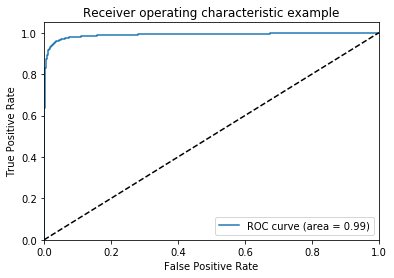

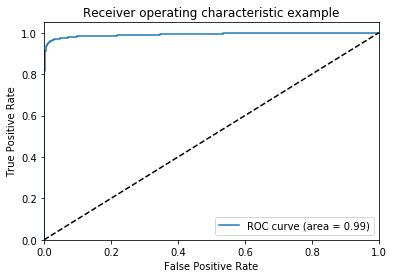

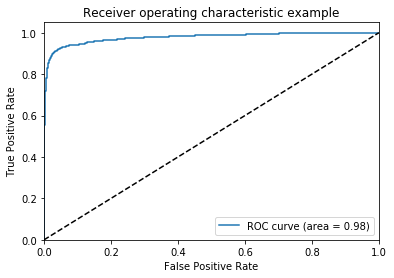

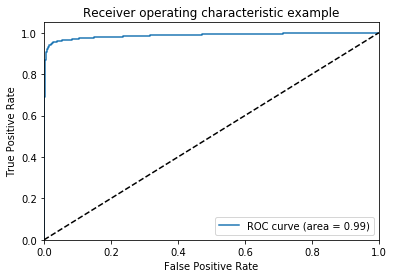

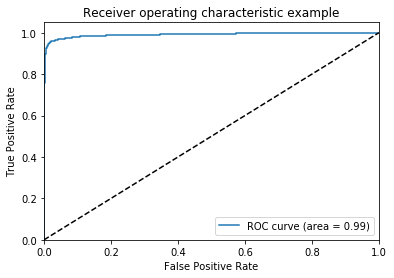

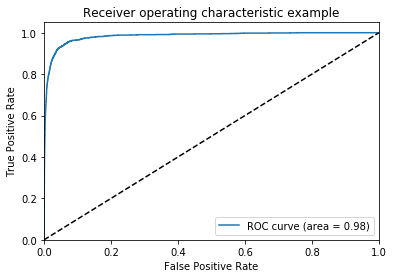

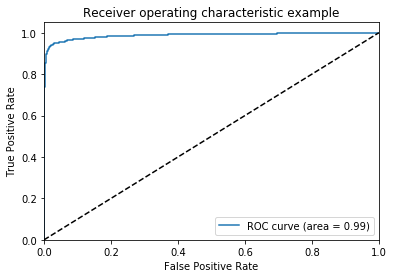

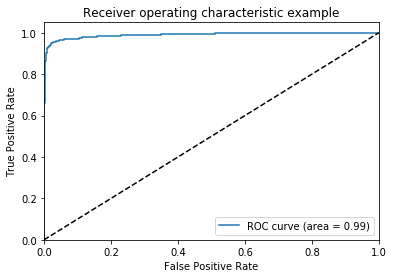

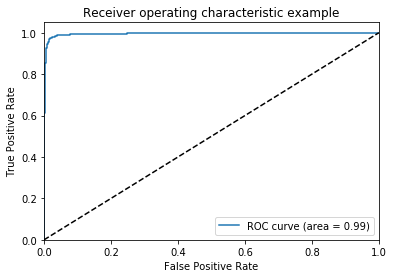

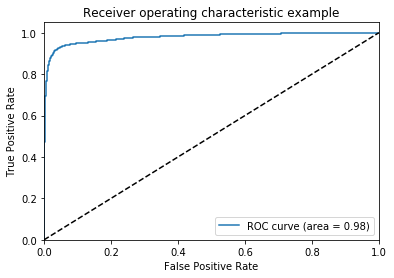

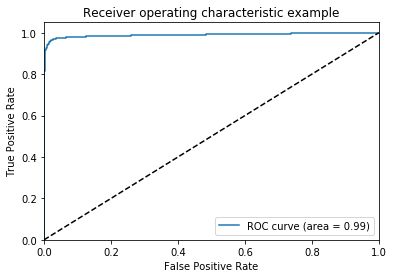

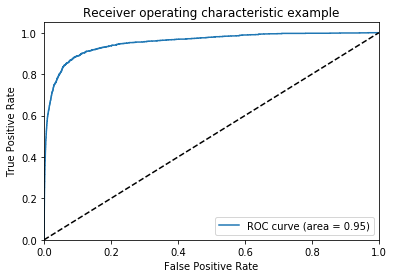

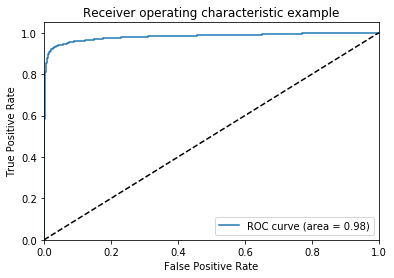

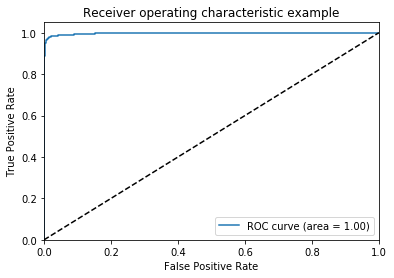

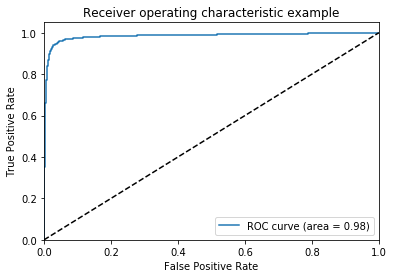

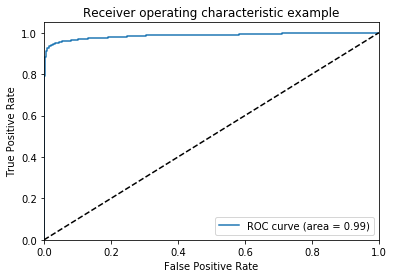

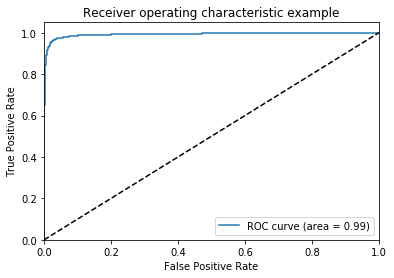

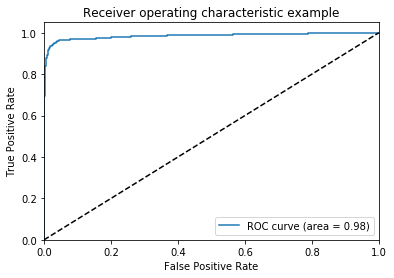

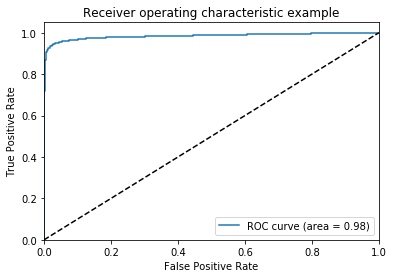

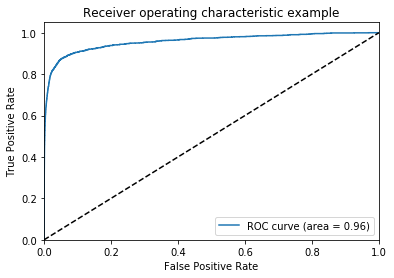

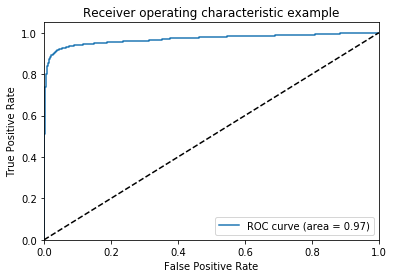

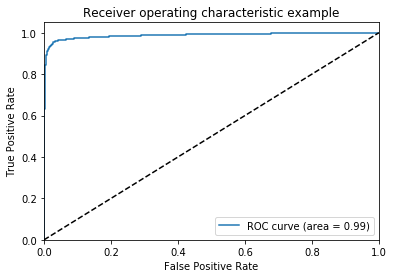

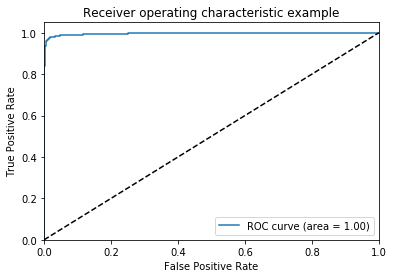

In [84]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
# some defaults
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
num_classes = 23
n_neighbors = 5
X_train = result.cpu().detach().numpy()
X_test = X_test.cpu().detach().numpy()
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0, max_iter=10000))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

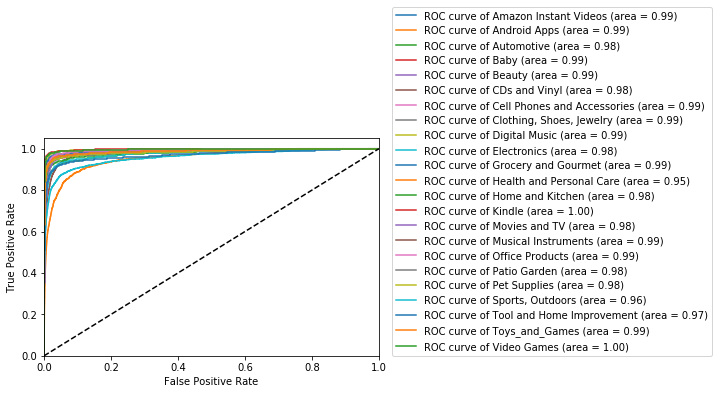

In [86]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
labels = get_all_labels()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(get_lebel_from_code(i), roc_auc[i]))
  
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic for {}'.format(get_lebel_from_code(i)))
plt.legend(loc=(1.04,0))
plt.savefig('roc.png',dpi=400,bbox_inches='tight')
plt.show()

#tSNE implementation

In [0]:
result.shape
input_tsne = result.cpu().detach().numpy()

In [0]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(input_tsne)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 155151 samples in 0.108s...
[t-SNE] Computed neighbors for 155151 samples in 10.595s...
[t-SNE] Computed conditional probabilities for sample 1000 / 155151
[t-SNE] Computed conditional probabilities for sample 2000 / 155151
[t-SNE] Computed conditional probabilities for sample 3000 / 155151
[t-SNE] Computed conditional probabilities for sample 4000 / 155151
[t-SNE] Computed conditional probabilities for sample 5000 / 155151
[t-SNE] Computed conditional probabilities for sample 6000 / 155151
[t-SNE] Computed conditional probabilities for sample 7000 / 155151
[t-SNE] Computed conditional probabilities for sample 8000 / 155151
[t-SNE] Computed conditional probabilities for sample 9000 / 155151
[t-SNE] Computed conditional probabilities for sample 10000 / 155151
[t-SNE] Computed conditional probabilities for sample 11000 / 155151
[t-SNE] Computed conditional probabilities for sample 12000 / 155151
[t-SNE] Computed conditional proba

In [0]:
label_all = [label.cpu().numpy() for label,_ in embedding_space]
label_all[0]

array(4)

In [0]:
subset_size = 10000
tsne_results_subset = tsne_results[:subset_size]
label_all_subset = label_all[:subset_size]

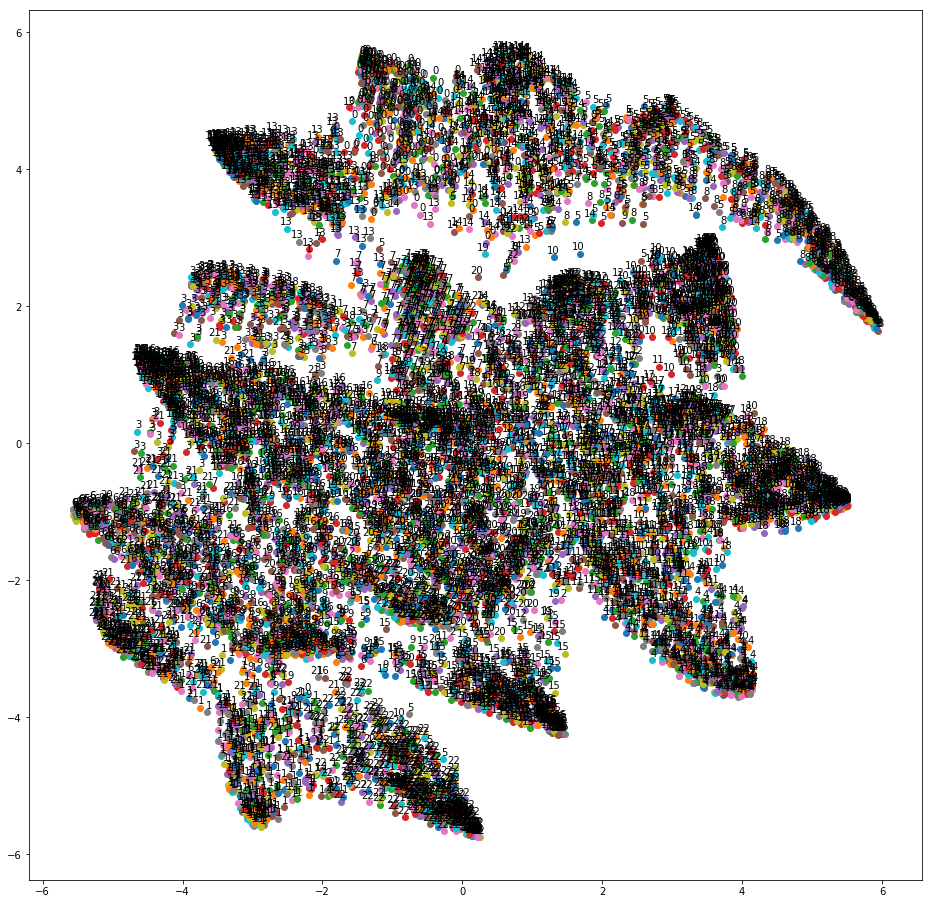

In [0]:
labels = []
tokens = []


x = []
y = []
for value in tsne_results_subset:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(label_all_subset[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.savefig("tsne.png", dpi = 500)
plt.show()


# Include here the section for using training set

In [25]:
%cd /content/
test_data = pd.read_pickle('/content/drive/My Drive/dtest_20k_accuracytest_encoded_labelsmappedandreduced.pkl')

/content


In [26]:
test_data.head()

,sentence_embedding,labels_encoded
0,"[[0.020630155, -5.427392e-05, -0.0005429585, 0...",2
1,"[[0.009404534, -0.00013506821, 0.0029931439, 0...",2
2,"[[0.0118809715, -1.7096989e-05, 0.017329859, 0...",2
3,"[[0.013619319, -0.000120394856, -0.00017446173...",2
4,"[[0.013776152, 0.0014088053, 0.0023799718, 0.0...",2


In [27]:
len(test_data)
# test_data.columns

13184

In [28]:
test_data.groupby(test_data.labels_encoded).count()

,sentence_embedding
labels_encoded,
0,999
1,999
2,402
3,794
5,999
7,999
8,999
9,999
13,999


In [0]:
# We need to define a specific dataloader in this case, which shall be frankly, quite simple and dummy
class TestDataset(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """

    def __init__(self, dataset, select_column):
         
        
        self.dataset = dataset
        self.train_labels = self.dataset.labels_encoded
            # Drop the labels column so that remaining features form part of the training set
        self.dataset = self.dataset.drop('labels_encoded', axis=1)
        self.train_data = self.dataset
        self.select_column = select_column
       
    def __getitem__(self, index):
        #print(type(self.train_data))
        selected_frame, label = self.train_data.iloc[index], self.train_labels.iloc[index]
        str_data = selected_frame[self.select_column]

        return str_data, label

    def __len__(self):
        return len(self.dataset)

In [0]:
# Let us split the data into train and test sections. This we can use later for our purpose
# interestingly, missing out on shuffling would lead to unexpected results
# so we need to take care of that as well
# This command shuffles the dataset completely
test_data_one_shot = test_data.sample(frac=1).reset_index(drop=True)
# now we split it
train_split = 0.2
last_train_index = int(len(test_data_one_shot) * train_split)
test_data_train = test_data_one_shot.iloc[:last_train_index]
test_data_test = test_data_one_shot.iloc[last_train_index:]

In [49]:
test_data_train.sentence_embedding.iloc[-1] != test_data_test.sentence_embedding.iloc[0]  #Indicating that our splits of the data are correct

array([[ True,  True,  True, ...,  True,  True,  True]])

In [56]:
set(test_data_train.labels_encoded) == set(test_data_test.labels_encoded)

True

In [57]:
test_data_train.groupby(test_data_train.labels_encoded).count()

,sentence_embedding
labels_encoded,
0,194
1,186
2,83
3,172
5,203
7,209
8,216
9,203
13,188


In [0]:
# Global declarations
batch_size = 100

In [0]:
one_shot_train_dataset = SoftmaxDataset(dataset=test_data_train,select_column='sentence_embedding')
one_shot_test_dataset = SoftmaxDataset(dataset=test_data_test,select_column='sentence_embedding')
# Now the dataloaders need to be defined as well
one_shot_train_loader = DataLoader(one_shot_train_dataset, batch_size=batch_size,shuffle=True)
one_shot_test_loader = DataLoader(one_shot_test_dataset, batch_size=batch_size,shuffle=True)

## First try the Neural Network Thingy :P

In [0]:
# TODO: Still not ready. Please refer to the KNN part for now
all_labels = []
all_predictions=[]
loss_val = 0
with torch.no_grad():
    for data in one_shot_test_loader:
        inputs, labels = data
        inputs = inputs.cuda()
        batch_size = inputs.shape[0]
        inputs = inputs.reshape(batch_size,-1)
        # Next the evaluation
        outputs = net(inputs)
        labels = labels.cuda()
        loss = criterion(outputs, labels)
        loss_val = loss_val + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        for idx in range(batch_size):
            all_predictions.append(predicted[idx].item())
            all_labels.append(labels[idx].item())

NameError: ignored

In [0]:
f1_score(all_labels, all_predictions, average='micro') 

0.05522951870214847

In [0]:
f1_score(all_labels, all_predictions, average='macro') 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.04400455678375561

In [0]:
labels = list(set(data_train.labels_encoded))
cm = confusion_matrix(all_labels, all_predictions, labels)

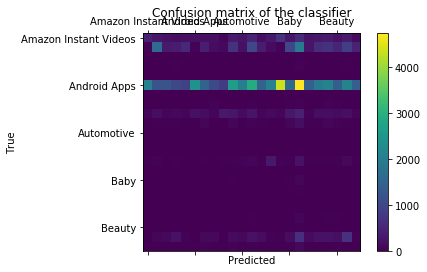

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + get_all_labels())
ax.set_yticklabels([''] + get_all_labels())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

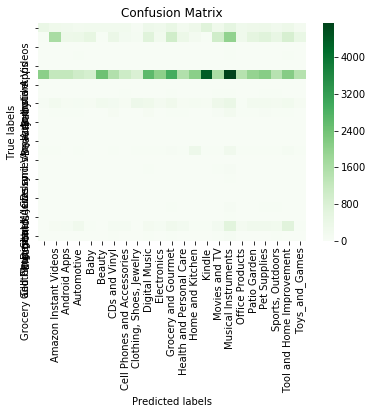

In [0]:
ax= plt.subplot()
sns.heatmap(cm, annot=False, ax = ax, fmt='g', cmap='Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([''] + get_all_labels());
ax.yaxis.set_ticklabels([''] + get_all_labels());

In [0]:
accuracy_score(all_labels, all_predictions)

0.08125140670717983

In [0]:
print(classification_report(all_labels, all_predictions,labels=labels, target_names=get_all_labels()))

                             precision    recall  f1-score   support

      Amazon Instant Videos       0.16      0.06      0.09      6724
               Android Apps       0.47      0.13      0.21     12491
                 Automotive       0.00      0.07      0.01        83
                       Baby       0.01      0.15      0.03       190
                     Beauty       0.00      0.00      0.00         0
              CDs and Vinyl       0.83      0.05      0.10     44765
Cell Phones and Accessories       0.00      0.00      0.00         0
   Clothing, Shoes, Jewelry       0.03      0.14      0.05       318
              Digital Music       0.24      0.08      0.12      3830
                Electronics       0.02      0.11      0.03       798
        Grocery and Gourmet       0.00      0.00      0.00         0
   Health and Personal Care       0.00      0.25      0.00        12
           Home and Kitchen       0.00      0.11      0.00        18
                     Kindle      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Load the best TripletNetwork Model in this step

##  Generating some set of embeddings before getting train examples

In [0]:
embedding_model = model

In [0]:
# Let us save the embedding of all elements in the train_data as well as their index
# this can be used later for our purpose
embedding_space_one_shot = []
for i, data in enumerate(one_shot_train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        batch_size = inputs.shape[0]
        inputs = inputs.reshape(batch_size,-1)
        labels = labels.cuda()
        embeddings = embedding_model.fc(inputs)
        for index,tensor in enumerate(embeddings):
           embedding_space_one_shot.append((labels[index],tensor))

In [53]:
y_train = []
dist = []
for index,space in embedding_space_one_shot[:-1]:
  dist.append(space)
  y_train.append(index.item())
# dist = [space for index,space in embedding_space_one_shot[:-1]]
result = torch.stack(dist, dim=0)
result.shape

torch.Size([2635, 64])

In [0]:
#select the norm
def select_norm(vector_x, power=2):
  return torch.norm(vector_x,p=power,dim=1)

## KNN Code Section

In [0]:
def k_nearest_neighbour(distance_embeddings, vector, k=3):  
    updated_result = select_norm(vector_x=(distance_embeddings - vector), power=2)
    values, indices = torch.topk(updated_result,k=k ,largest=False)
    candidate_indexes = []
    for index in indices:
      candidate_indexes.append((embedding_space_one_shot[index][0]).item())
    return Counter(candidate_indexes).most_common(1)[0][0]

## The embeddings that were generated by our best model needs to be used

In [55]:
correct = 0
total = 0
all_labels = []
all_predictions_one_shot=[]
for data in one_shot_test_loader:
    inputs, labels = data
    inputs = inputs.cuda()
    batch_size = inputs.shape[0]
    inputs = inputs.reshape(batch_size,-1)
    # Next the evaluation
    
    output = embedding_model.fc(inputs)
    for idx,query in enumerate(output):
        predicted = k_nearest_neighbour(result, query, 5)
#         print(labels[idx])
#         print(predicted)
        all_predictions_one_shot.append(predicted)
        correct += (predicted == labels[idx])
        all_labels.append(labels[idx].item())
    total += labels.size(0)
    correct = correct.cpu().sum()
print('Accuracy of the network on the test samples: %d %%' % (
        100 * correct /total))

Accuracy of the network on the test samples: 19 %


In [41]:
f1_score(all_labels, all_predictions_one_shot, average='micro') 

0.20970800151687524

In [42]:
f1_score(all_labels, all_predictions_one_shot, average='macro') 

0.19815518911564642

In [0]:
labels = list(set(data_train.labels_encoded))
cm = confusion_matrix(all_labels, all_predictions_one_shot, labels)

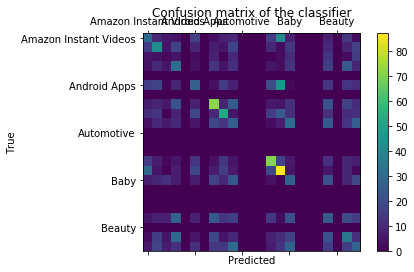

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + get_all_labels())
ax.set_yticklabels([''] + get_all_labels())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

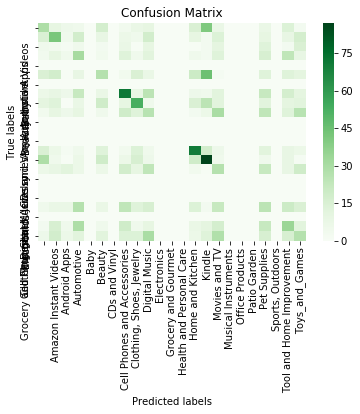

In [45]:
ax= plt.subplot()
sns.heatmap(cm, annot=False, ax = ax, fmt='g', cmap='Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([''] + get_all_labels());
ax.yaxis.set_ticklabels([''] + get_all_labels());

In [46]:
accuracy_score(all_labels, all_predictions_one_shot)

0.20970800151687524

In [47]:
print(classification_report(all_labels, all_predictions_one_shot,labels=labels, target_names=get_all_labels()))

                             precision    recall  f1-score   support

      Amazon Instant Videos       0.19      0.16      0.17       178
               Android Apps       0.23      0.23      0.23       182
                 Automotive       0.03      0.02      0.03        84
                       Baby       0.16      0.20      0.18       154
                     Beauty       0.00      0.00      0.00         0
              CDs and Vinyl       0.17      0.13      0.15       201
Cell Phones and Accessories       0.00      0.00      0.00         0
   Clothing, Shoes, Jewelry       0.32      0.31      0.32       231
              Digital Music       0.29      0.26      0.27       206
                Electronics       0.13      0.13      0.13       196
        Grocery and Gourmet       0.00      0.00      0.00         0
   Health and Personal Care       0.00      0.00      0.00         0
           Home and Kitchen       0.00      0.00      0.00         0
                     Kindle      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Finally the tSNE for the samples that we see now

In [0]:
result.shape
input_tsne = result.cpu().detach().numpy()

In [44]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(input_tsne)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19999 samples in 0.069s...
[t-SNE] Computed neighbors for 19999 samples in 49.111s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19999
[t-SNE] Computed conditional probabilities for sample 2000 / 19999
[t-SNE] Computed conditional probabilities for sample 3000 / 19999
[t-SNE] Computed conditional probabilities for sample 4000 / 19999
[t-SNE] Computed conditional probabilities for sample 5000 / 19999
[t-SNE] Computed conditional probabilities for sample 6000 / 19999
[t-SNE] Computed conditional probabilities for sample 7000 / 19999
[t-SNE] Computed conditional probabilities for sample 8000 / 19999
[t-SNE] Computed conditional probabilities for sample 9000 / 19999
[t-SNE] Computed conditional probabilities for sample 10000 / 19999
[t-SNE] Computed conditional probabilities for sample 11000 / 19999
[t-SNE] Computed conditional probabilities for sample 12000 / 19999
[t-SNE] Computed conditional probabilities for s

In [45]:
label_all = [label.cpu().numpy() for label,_ in embedding_space_one_shot]
label_all[0]

array(15)

In [0]:
subset_size = 2000
tsne_results_subset = tsne_results[:subset_size]
label_all_subset = label_all[:subset_size]

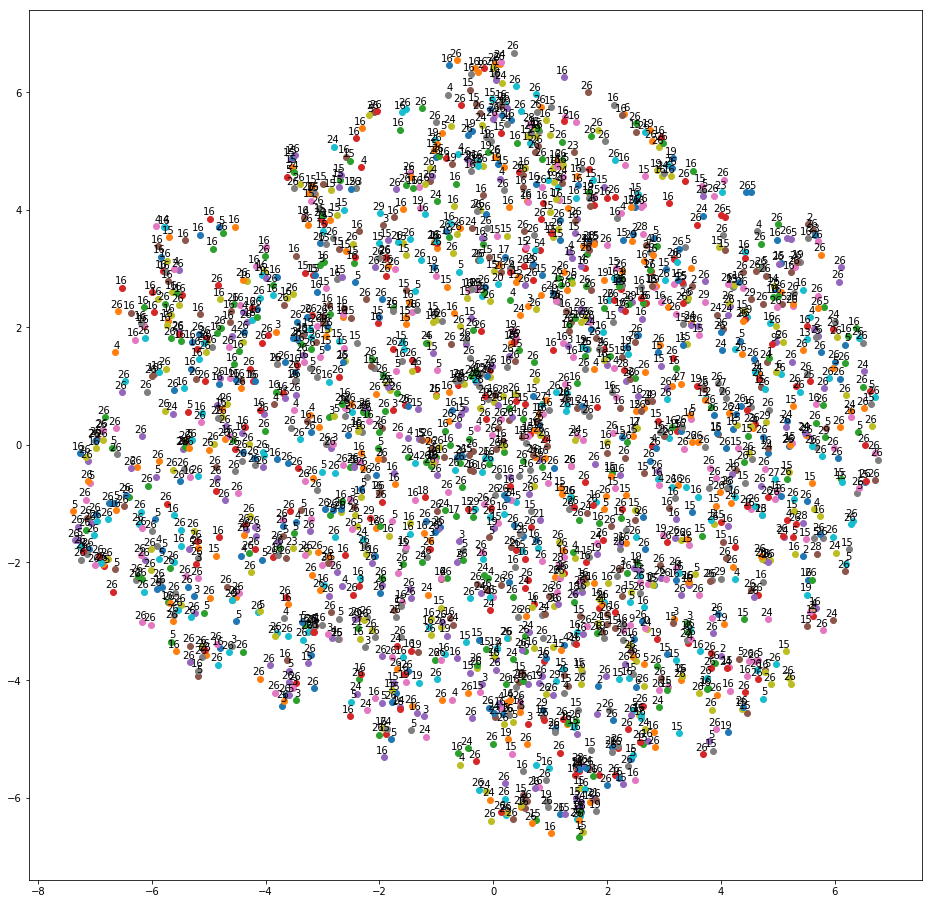

In [51]:
labels = []
tokens = []


x = []
y = []
for value in tsne_results_subset:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(label_all_subset[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.savefig("tsne-test.png", dpi = 500)
plt.show()


In [0]:
total_data = pd.read_csv('/content/d_test_23cats_onlyDE_fastBPE.csv', index_col=[0])
total_data.head()

In [0]:
allowed_labels = encoding_to_labels.values()
allowed_labels_list = list(allowed_labels)
print(allowed_labels_list)

In [0]:
label_set = set(total_data.label)
print(sorted(label_set))

In [0]:
equivalence_set = {
    'Digital_Ebook_Purchase' : 'Kindle',    
}

In [0]:
correct_labels = []
for label in label_set:
  if label in allowed_labels_list:
    correct_labels.append(label)
print(correct_labels)

# Let us create a label mapper completely

In [0]:
# Again, as the apply function can take a single param
# so we have hardcoded the "allowed_labels_list"
def refine_label(label):
  return label in allowed_labels_list

In [0]:
total_data['condition'] = total_data.label.apply(refine_label)

In [0]:
total_data.condition.describe()

In [0]:
z = total_data[total_data.condition == True] 

In [0]:
set(z.label)

In [0]:
z.head()

In [0]:
le = LabelEncoder()
z['labels_encoded'] = le.fit_transform(z['label'])

In [0]:
z.head()

In [0]:
z.labels_encoded = z.labels_encoded.map({
    0:2,
    1:3,
    2:9,
    3:15,
    4:16,
    5:22
})

In [0]:
z.head()

In [0]:
final_dataset = z[['tokenized_review_bpe','labels_encoded']]

In [0]:
final_dataset.to_csv('shortened.csv')

# Try and filter only the labels model is performing great at